In [71]:
import cv2
import matplotlib.pyplot as plt

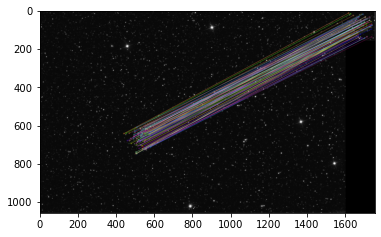

In [72]:
# read images
a = cv2.imread("documents/brief/a.png", 0)
b = cv2.imread("documents/brief/b.png", 0)
c = cv2.imread("documents/brief/c.png", 0)

# equalize histograms
img1 = cv2.equalizeHist(a)
img2 = cv2.equalizeHist(b)
img3 = cv2.equalizeHist(c)

# create sift feature extractor object
sift = cv2.xfeatures2d.SIFT_create()

# detect keypoints
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img3, None)

# create bf keypoint matcher
bf = cv2.BFMatcher()

matches = bf.knnMatch(des1, des2, k=2)
good = []
for m, n in matches:
    if(m.distance < 0.4 * n.distance):
        good.append([m])

newimg = cv2.drawMatchesKnn(a, kp1, c, kp2, good, img1, flags=2)
cv2.imwrite(r"documents/brief/output.png", newimg)
plt.imshow(newimg, 'gray')